$$
\newcommand{theorem}{\textbf{Theorem: }}
\newcommand{proof}{\textbf{Proof: }}
\newcommand{example}{\textbf{Example: }}
\newcommand{lemma}{\textbf{Lemma: }}
\newcommand{corollary}{\textbf{Corollary: }}
\newcommand{prop}{\textbf{Proposition: }}
$$

$$
\newcommand{v}{\mathbf}
\newcommand{inv}{^{-1}}
\newcommand\mat[1]{\begin{pmatrix}#1\end{pmatrix}} 
\newcommand\det[1]{\left| #1\right|} 
\newcommand\norm[1]{\lVert #1\rVert} 
\newcommand\set[1]{\left\{#1\right\}} 
\newcommand\dels[2]{\frac{\partial #1}{\partial #2}} 
$$

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [27]:
%matplotlib notebook

In [29]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

def f(x):
    return np.sin(2 * x)
f = np.vectorize(f)

t = np.linspace(0, 30)

fig, ax = plt.subplots()
ax.axis([0,np.pi,-3,3])
l, = ax.plot([],[])

def animate(i):
    l.set_data(xs, 0.5 * (f(xs + c * t[i]) + f(xs - c * t[i])))

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

from IPython.display import HTML
HTML(ani.to_jshtml())


<IPython.core.display.Javascript object>

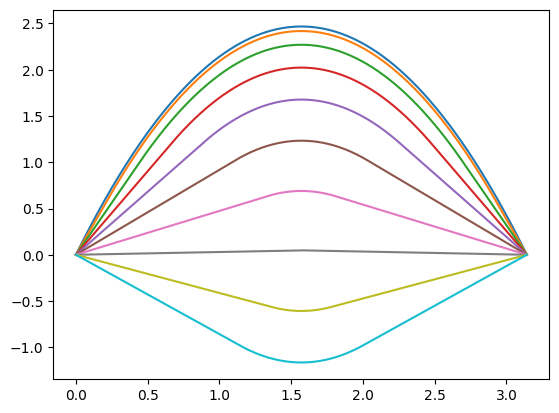

In [15]:
xs = np.linspace(0, np.pi, num=1000)
c = 0.2

ts = np.linspace(-4 * np.pi, 4 * np.pi)

for t in np.linspace(0, 10, num=10):
    ys = 0.5 * (f(xs + c * t) + f(xs - c * t))
    plt.plot(xs, ys)

# Introduction

A **differential equation** (DE) is an equation that contains some derivatives of a differentiable function.

There are some characteristics of DE.

## Ordinary

An **ordinary** DE equation has only 1 independent variable.
All terms in the DE are functions of this variable.

This contrasts with **partial** DE which can have multiple independent variables.

_This module will only focus on ordinary DE's._

## Order

The order refers to the highest order derivative of the DE.

## Linear

A DE is linear if it has the form of:

$$
F = a_n y^n (x) a_{n-1} y^{n-1} (x) + \cdots + a_1 y^1 (x) + a_0 y(x)
$$

where $F, a_n$ and $y(x)$ are functions of $x$; $y^{n}(x)$ is the $n$-th derivative of $y$ with respect to $x$.

Less formally, they have the form
$$
F = a_0 y + a_1 y' + a_2 y'' + a_3 y''' + \cdots
$$

A general solution of a $n$-th order DE will have $n$ arbitrary constants.

## Separable

A **first order** DE is separable if it can be written as:

$$
M(x) - N(y) y' = 0
$$

We can solve this DE by rearranging and integrating both sides, as per below:
$$
\begin{align*}
& M(x) - N(y) y' = 0 \\
\Rightarrow  & M(x) - N(y) \frac{dy}{dx} = 0 \\
\Rightarrow  & M(x) = N(y) \frac{dy}{dx} \\
\Rightarrow  & \int M(x) dx = \int N(y) \frac{dy}{dx} dx + C\\
\Rightarrow  & \int M(x) dx = \int N(y) dy + C\\
\end{align*}
$$

### Reduction to separable form

Certain first order DE are not separable, but can be made so by a change of variable.

For equations of the form:
$$
y' = g\left(\frac{y}{x}\right)
$$

_ie_ $g$ is a function  of $\frac{y}{x}$.

We can set $u = \frac{y}{x}$, then $y = ux, y' = u + xu'$.

Substituting back, we get:
$$
y' = g(u) = u + xu'
$$

which is separable:
$$
\begin{gather*}
g(u) = u + xu' \\
g(u) - u = xu' \\
\frac{g(u) - u}{x} = u' \\
\frac{1}{x} = \frac{u'}{g(u) - u} \\
\end{gather*}
$$

Thus, we can solve for $u$ and obtain $y$.

### Linear change of variable

A DE of the form $y' = f(ax + by +c)$ can be solved by setting $u = ax + by + c$.

## Linear first order ODE

Combining our definitions, a linear first order DE has the form of
$$
y' + P(x)y = Q(x)
$$

To solve it, we define a new function $R(x) = e^{\int ^x P(s) ds}$.

Since $R' = RP$, we get $(Ry)' = RPy + Ry'$.

From our equation definition, we get
$$
\begin{gather*}
y' + P(x)y = Q(x) \\
Q = y' + Py\\
RQ = Ry' + RPy = (Ry)'
\end{gather*}
$$

$R$ is known as the **integrating factor** for the equation.

$\example$

Suppose we wish to solve:
$$
y' + \frac{2}{x}y = x^2
$$

$$
\begin{align*}
P = \frac{2}{x} &\quad Q = x^2\\
R &= e^{2 \ln x} = x^2 \\
RQ &= (Ry)' \\
\Rightarrow  x^2 x^2 &= (x^2 y)' \\
\Rightarrow  x^4 &= (x^2 y)' \\
\Rightarrow  \frac{x^5}{5} &= x^2 y + C \\
\Rightarrow  y &= \frac{x^3}{5} - \frac{C}{x^2}
\end{align*}
$$

We can verify this as:
$$
\begin{align*}
y' &= \frac{3x^2}{5} + \frac{2C}{x^3} \\
\Rightarrow y' + \frac{2}{x} y &= \frac{3x^2}{5} + \frac{2C}{x^3} + \frac{2}{x} \left( \frac{x^3}{5} - \frac{C}{x^2} \right) \\
&= \frac{3x^2}{5} + \frac{2C}{x^3} + \frac{2x^2}{5} - \frac{2C}{x^3} \\
&= \frac{3x^2}{5} + \frac{2x^2}{5}  \\
&= x^2
\end{align*}
$$

## Bernoulli equations

Bernoulli equations are of the form:
$$
y' + p(x)y = q(x)y^n
$$

Note that $n = 0$ or $1$ if and only if it is linear.

We substitute using $z = y^{1-n}$.

Then $z' = (1-n) y^{-n} y'$.

$$
\begin{align*}
y' + p(x)y &= q(x)y^n \\
\Rightarrow  
(1-n) y' + (1-n)y p(x) &= (1-n)y^n q(x) \\
(1-n) y^{-n} y' + (1-n)y^{1-n} p(x) &= (1-n) q(x) \\
z' + (1-n) z p(x) &= (1-n) q(x) \\
\end{align*}
$$

This is a first order, linear DE which we can solve using the previous method.

$\example$

Solve 
$y' - \frac{2y}{x} = -x^2 y^2$

$$
\begin{align*}
p(x) = -\frac{2}{x}, &\quad q(x) = -x^2 \\
n = 2, & \quad z = y^{1-n} = y^{-1} \\
z' + (1-n) z p(x) &= (1-n) q(x) \\
z' + \frac{2z}{x} &= x^2 \\
\end{align*}
$$

From our previous example, we solve it as:
$$
z &= \frac{x^3}{5} - \frac{C}{x^2}
$$

Hence,
$$
\begin{align*}
y^{-1} = z = \frac{x^3}{5} - \frac{C}{x^2} \\
y = \frac{1}{\frac{x^3}{5} - \frac{C}{x^2} } = \frac{5x^2}{x^5 - 5C}
\end{align*}
$$

## Second order linear DE

**Second order linear DE** are of the form:
$$
y'' + p(x) y' + q(x) y = F(x)
$$

The DE is **homogeneous** if $F(x) = 0$, otherwise it is non-homogeneous.

When talking about solutions to the DE, we need to specify the interval $I$ where the solution is valid for all $x$ in $I$.

### Homogeneous DE

$\theorem$:
For any homogeneous DE, with two solutions on the open interval $I$,
any linear combinations of the two solutions is also a solution.

This is because the differential are linear in nature, leading to the [linearity of the solution set](../linear_algebra/euclidean_space.ipynb#solution-set-subspace).

Note: This does not apply for non-homogeneous or non-linear DE's.

For example, given the non-homogeneous $y'' - y = 1$, $e^x - 1$ is a solution, but $2(e^x - 1)$ is not a solution.

Given the non-linear $yy'' - xy' = 0$, $y=x^2$ is a solution, but $y = 2x^2$ is not a solution.

---

A **general solution** of the DE is $y = c_1 y_1 + c_2 y_2$,
where $y_1, y_2$ are **independent functions** of $x$ defined on $I$,
and $c_1, c_2$ are arbitrary constants.

The functions are independent if they are not constant multiples of each other.

_See also: [similar definition in linear algebra](../linear_algebra/euclidean_space.ipynb#Linear-independence)_

A **particular solution** assigns some value to $c_1, c_2$.

#### Constant coefficients

_See also: [Linear algebra approach to solving](../linear_algebra/linear_differential_equations.ipynb#Finding-solutions)_

Suppose that $p(x) = a$ and $q(x) = b$ for some constants $a,b$, 
_ie_, the equation has the form
$$
y'' + ay' + by = 0
$$

Notice that we need the $y''$, $y'$ and $y$ terms to cancel each other out.
This rules out polynomials as the degree of each subsequent term would be decreasing, preventing us from cancelling them.

This inspires us to use $e^{\lambda x}$, since each subsequent term can cancel each other out.

Substituting, we get:
$$
(\lambda ^2 + a \lambda + b) e^{\lambda x} = 0
$$

Since $e^{\lambda x} > 0$, we can only have a solution when $\lambda ^2 + a\lambda  + b = 0$.

This is the **characteristic equation**.

The roots of the equation are:
$$
\lambda_1 = \frac{-a + \sqrt{a^2 -4b}}{2} \quad
\lambda_2 = \frac{-a - \sqrt{a^2 -4b}}{2}
$$

The roots determines the final form of our solution:

##### Distinct roots

If $a^2 -4b > 0$, then there are two distinct real roots.
Then our solution has the form 
$$
y = c_1 e^{\lambda _1 x} + c_2 e^{\lambda_2 x}
$$

##### Repeated roots

If $a^2 - 4b = 0$, then $\lambda _1 = \lambda 2 = - \frac{a}{2}$.

We know that one of the solution is $y_1 = e^{-\frac{a}{2}x}$, but we need one more.

We can try $y_2 = xe^{-\frac{a}{2} x}$, and we will notice that this indeed works.

Hence, our solution is of the form:
$$
y = (c_1 + c_2x) e^{-\frac{a}{2} x} 
$$

##### Complex roots

If $a^2 - 4b < 0$, then we have complex roots.

The solution is the same as in the [distinct roots](#Distinct-roots) case, but we can simplify:

$$
\begin{align*}
y &= c_1 e^{\lambda _1 x} + c_2 e^{\lambda_2 x} \\
&= c_1 e^{\frac{-a + \sqrt{a^2 - 4b}}{2} x} + c_2 e^{\frac{-a - \sqrt{a^2 - 4b}}{2} x} \\
&= e^{\frac{-a}{2} x} \left(c_1 e^{\frac{\sqrt{a^2 -4b}}{2}x} + c_2 e^{-\frac{\sqrt{a^2 -4b}}{2}x} \right) \\
&= e^{\frac{-a}{2} x} \left(c_1 e^{\frac{\sqrt{4b - a^2}}{2} ix} + c_2 e^{-\frac{\sqrt{4b - a^2}}{2} ix} \right) \\
&= e^{\frac{-a}{2} x} \left(c_1 e^{\omega ix} + c_2 e^{-\omega ix} \right) \quad \omega = \frac{\sqrt{4b - a^2}}{2} = \sqrt{b -\frac{a^2}{4}}\\
&= e^{\frac{-a}{2} x} \left(c_1 \left(\cos \omega x + i \sin \omega x \right) + c_2 \left(\cos (-\omega x) + i \sin (-\omega x)  \right)  \right) \\
&= e^{\frac{-a}{2} x} \left((c_1 + c_2) \cos \omega x + (c_1 - c_2) i \sin \omega x \right)\\
&= e^{\frac{-a}{2} x} \left(C_1 \cos \omega x + C_2 \sin \omega x \right) \quad C_1 = c_1 + c_2, C_2 = (c_1 - c_2) i\\
\end{align*}
$$

### Non-homogeneous DE

$\theorem$:
A general solution of the non-homogeneous DE has the form:
$$
y(x) = y_h(x) = y_p(x)
$$

where $y_h(x) = c_1y_1(x) + c_2 y_2(x)$ is a general solution to the homogeneous DE,
and  $y_p(x)$ is _any_ solution to the non-homogeneous DE.

There are 2 ways to find $y_p(x)$:

#### Solving algebraically

Recall: 

$$
y'' + p(x) y' + q(x) y = F(x)
$$

We can solve algebraically, depending on the form of $F(x)$.

##### Polynomial

We set $y$ as a polynomial with the same order as $F(x)$, with unknown coefficients.
We differentiate and compare the terms to get the value of the coefficients.


$\example$

To solve $y'' - 4y' + y = x^2 +1$, we set $y = Ax^2 + Bx + C$.

Then, 
$$
\begin{gather*}
2A - 4(2Ax + B) + Ax^2 + Bx + C = x^2 + 1 \\
Ax^2 + (B - 8A)x + 2A - 4B + C = x^2 + 1\\
\Rightarrow A = 1 \\
B - 8A = 0 \Rightarrow B = 8 \\
2A - 4B + C = 1 \Rightarrow C = 31 \\
y_p(x) = x^2 + 8x + 31
\end{gather*}
$$


##### Exponential

Set $y = u e^{kx}$ for some function $u$.

Then the substitution will reduce it into a [polynomial case](#Polynomial).

##### Trigonometric

We use $y = 

#### Variation of parameters

$\theorem$:
Given the homogeneous solutions, $y_1, y_2$,
a particular solution is
$$
y_p(x) = u' y_1' + v' y_2 '
$$

where:
$$
u = - \int \frac{y_2 F(x)}{y_1 y_2 ' - y_1 ' y_2} \quad
v = \int \frac{y_1 F(x)}{y_1 y_2 ' - y_1 ' y_2}
$$